# Proximal operators

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import solve
from scipy.sparse.linalg import lsqr
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.utils.wavelets import *

from pyproximal.proximal import *
from pyproximal import ProxOperator
from pyproximal.optimization.primal import *
from pyproximal.utils import moreau

## General Proximal Operator

In [2]:
pop = ProxOperator()

## Euclidean Norm

9.706634329158588


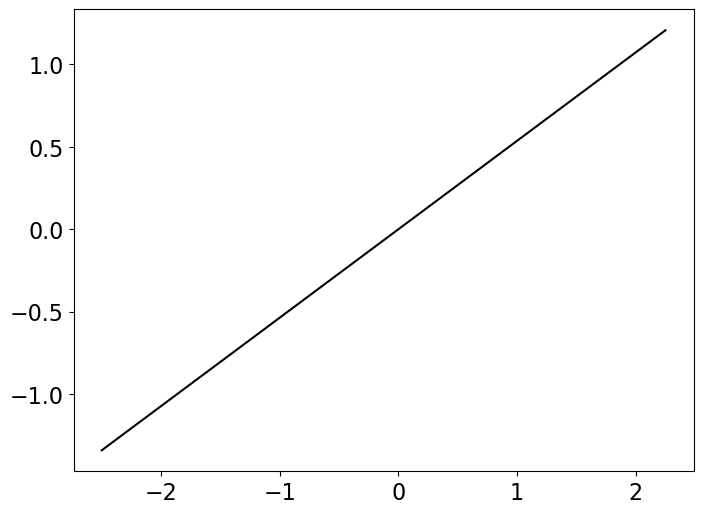

In [3]:
tau = 2
sigma = 1.5
eucl = Euclidean(sigma=sigma)

x = np.arange(-1, 1, 0.1) / 0.4
print(eucl(x))

xp = eucl.prox(x, tau)
plt.plot(x, xp, 'k');

True

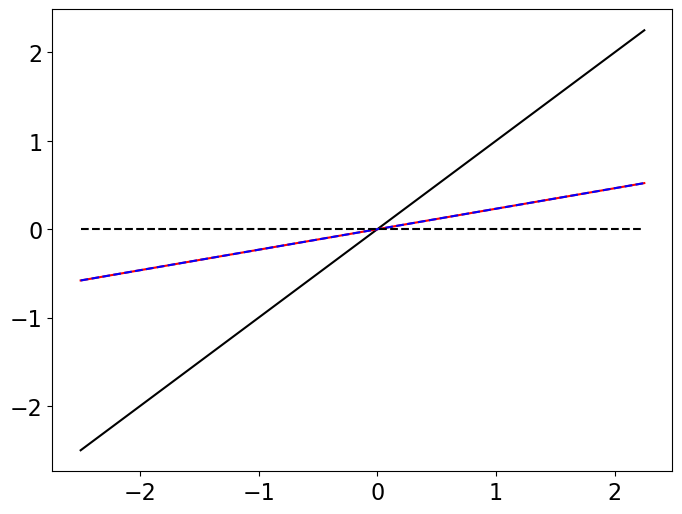

In [4]:
xdp = eucl.proxdual(x, tau)
xdp1 = eucl._proxdual_moreau(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xdp, 'r')
plt.plot(x, xdp1, '--b')
plt.plot(x, xdp-xdp1, '--k')

moreau(eucl, x, tau)

Lets now multiply sigma to an Euclidean object

In [5]:
eucl1 = sigma * Euclidean()

print(eucl(x) - eucl1(x))
print(eucl.prox(x, tau) - eucl1.prox(x, tau))
print(eucl.proxdual(x, tau) - eucl1.proxdual(x, tau))
print(eucl._proxdual_moreau(x, tau) - eucl1._proxdual_moreau(x, tau))

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.11022302e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  0.00000000e+00 -8.32667268e-17 -5.55111512e-17
  0.00000000e+00 -1.38777878e-17 -2.46519033e-32 -6.93889390e-18
  1.38777878e-17  0.00000000e+00  5.55111512e-17  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## $L_1$ norm

299.999999999999


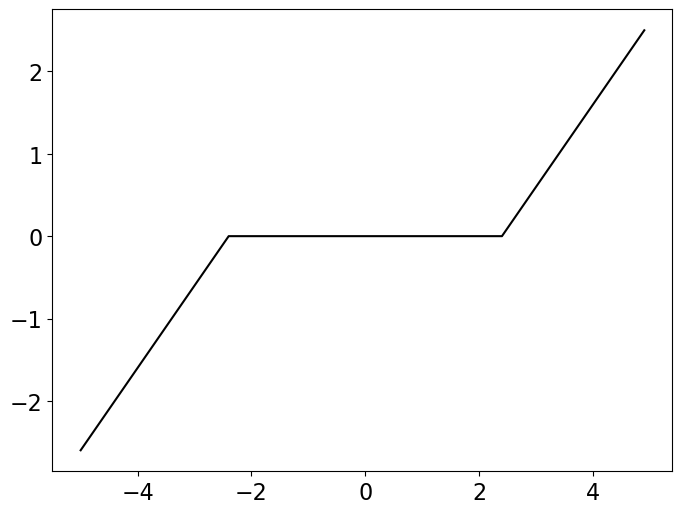

In [6]:
tau = 2.
sigma = 1.2
l1 = L1(sigma=sigma)

x = np.arange(-5, 5, 0.1)
print(l1(x))

xp = l1.prox(x, tau)
plt.plot(x, xp, 'k');

True

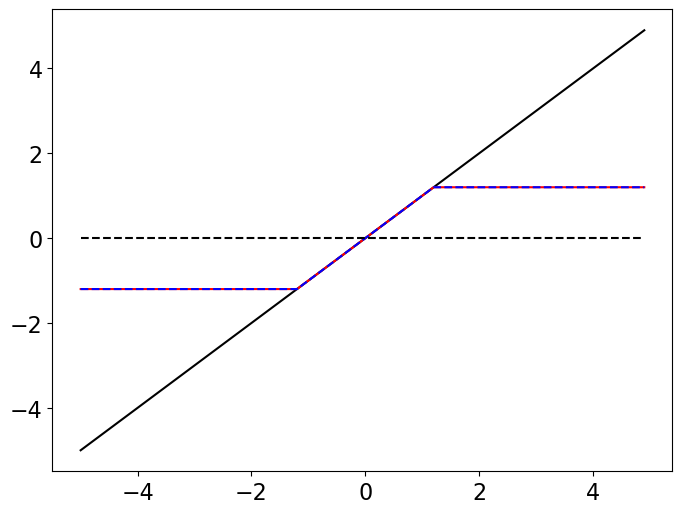

In [7]:
xdp = l1.proxdual(x, tau)
xdp1 = l1._proxdual_moreau(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xdp, 'r')
plt.plot(x, xdp1, '--b')
plt.plot(x, xdp-xdp1, '--k')

moreau(l1, x, tau)

In [8]:
l11 = sigma * L1()

print(l1(x) - l11(x))
print(l1.prox(x, tau) - l11.prox(x, tau))
print(l1.proxdual(x, tau) - l11.proxdual(x, tau))
print(l1._proxdual_moreau(x, tau) - l11._proxdual_moreau(x, tau))

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[ 2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16  2.22044605e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0000

299.999999999999


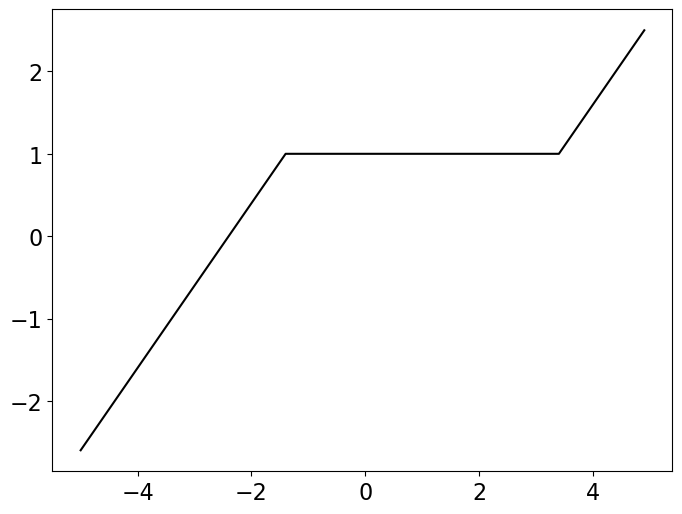

In [9]:
tau = 2.
sigma = 1.2 
x = np.arange(-5, 5, 0.1)
g=np.ones(x.size)
l1 = L1(sigma=sigma, g=np.ones(x.size))
print(l1(x))

xp = l1.prox(x, tau)
plt.plot(x, xp, 'k');

True

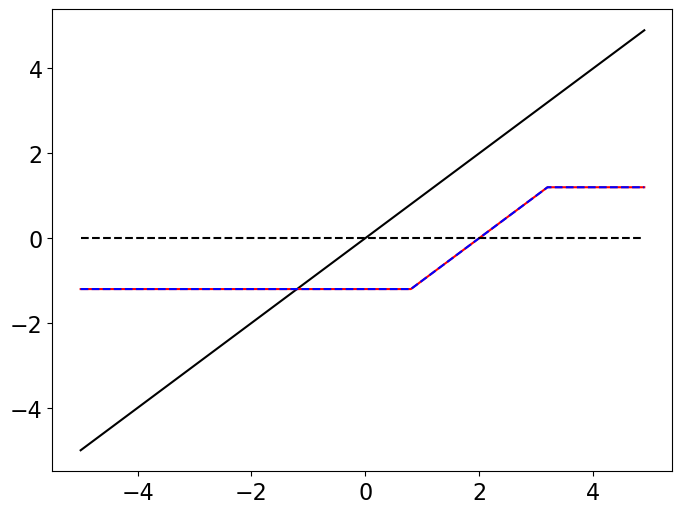

In [10]:
xdp = l1.proxdual(x, tau)
xdp1 = l1._proxdual_moreau(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xdp, 'r')
plt.plot(x, xdp1, '--b')
plt.plot(x, xdp-xdp1, '--k')

moreau(l1, x, tau)

In [11]:
l11 = sigma * L1(g=np.ones(x.size))

print(l1(x) - l11(x))
print(l1.prox(x, tau) - l11.prox(x, tau))
print(l1.proxdual(x, tau) - l11.proxdual(x, tau))
print(l1._proxdual_moreau(x, tau) - l11._proxdual_moreau(x, tau))

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## VStack

Use VStack to make L1 norm (we know that L1 is fully sepable so they should give the same result)

In [12]:
tau = 2.
sigma = 1.2

x = np.arange(-5, 5.3, 0.1)
nx = len(x)
nxs = [nx // 4] * 4
nxs[-1] = nx - np.sum(nxs[:-1])
print(nxs)
l1 = L1(sigma=sigma)
vstack = VStack([l1] * 4, nxs)

xp = l1.prox(x, tau)
xp1 = vstack.prox(x, tau)
print(xp - xp1)

[25, 25, 25, 28]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [13]:
tau = 2.
sigma = 1.2

x = np.arange(-5, 5.3, 0.1)
nx = len(x)
l1 = L1(sigma=sigma)
vstack = VStack([l1] * 2, restr=[Restriction(nx, np.arange(nx//2)), Restriction(nx, np.arange(nx//2, nx))])

xp = l1.prox(x, tau)
xp1 = vstack.prox(x, tau)
print(xp - xp1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


## Box

True

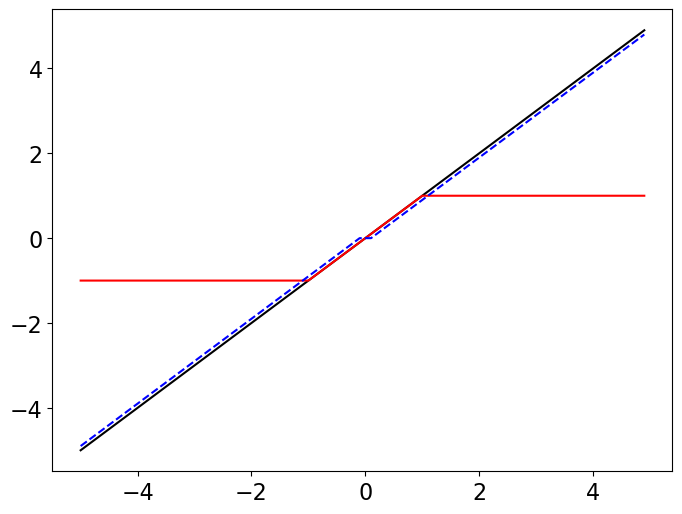

In [14]:
tau = 0.1
box = Box(-1, 1)

x = np.arange(-5, 5, 0.1)
xc = box(x)
xp = box.prox(x, tau)
xdp = box.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(box, x, tau)

## Constant

5


True

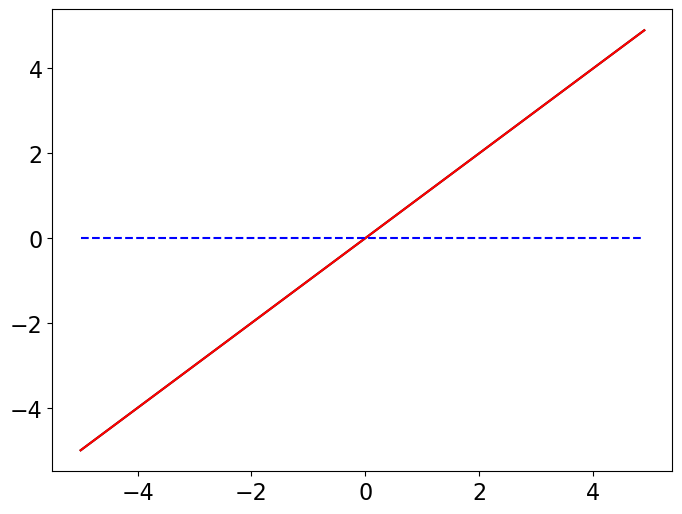

In [15]:
tau = 0.1
const = Quadratic(c=5)

x = np.arange(-5, 5, 0.1)
print(const(x))
xp = const.prox(x, tau)
xdp = const.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(const, x, tau)

## Dot product

-5.00000000000175


True

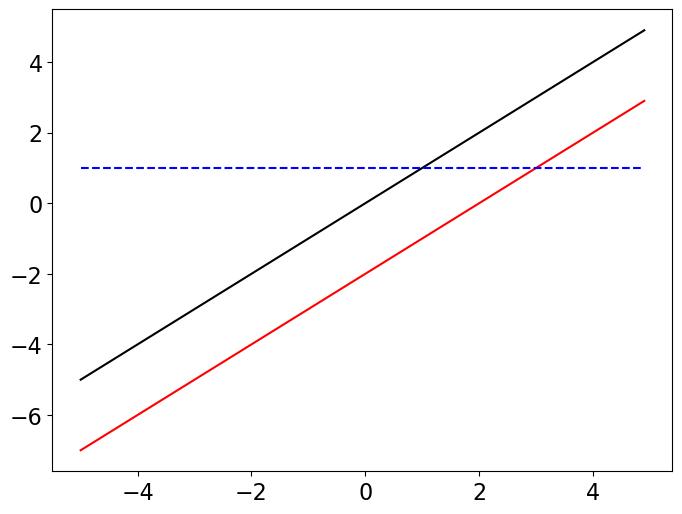

In [16]:
tau = 2.
x = np.arange(-5, 5, 0.1)

dot = Quadratic(b=np.ones_like(x))
print(dot(x))

xp = dot.prox(x, tau)
xdp = dot.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(dot, x, tau)

## Quadratic

38045.8987321786


True

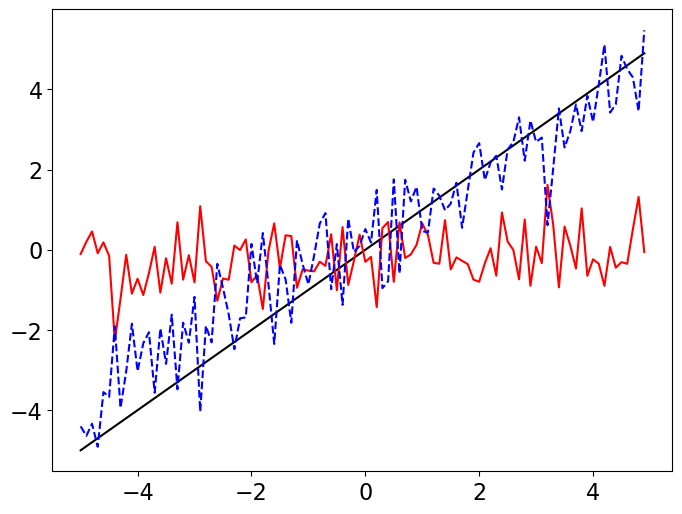

In [17]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)

A = np.random.normal(0, 1, (nx, nx))
A = A.T @ A
quad = Quadratic(Op=MatrixMult(A), b=np.ones_like(x), niter=500)
print(quad(x))

xp = quad.prox(x, tau)
xdp = quad.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(quad, x, tau)

## $L_2$ Norm

First we consider the case with Ax-b

77866.46154563026


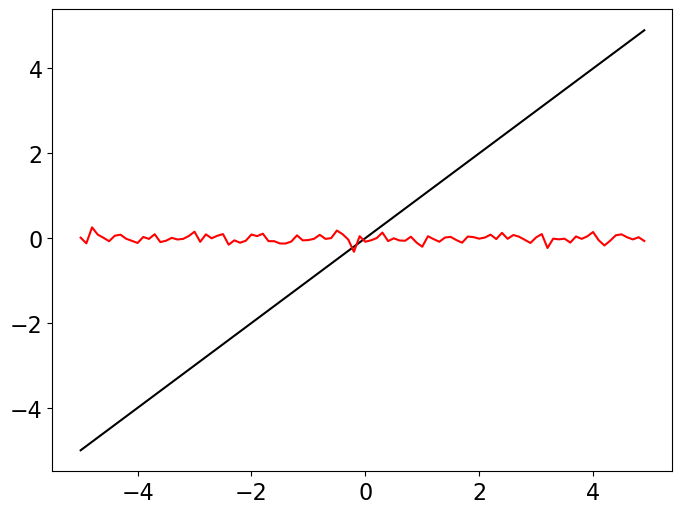

In [18]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)
ny = nx * 2
A = np.random.normal(0, 1, (ny, nx))

l2 = L2(Op=MatrixMult(A), b=np.ones(ny))
print(l2(x))
xp = l2.prox(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r');

True

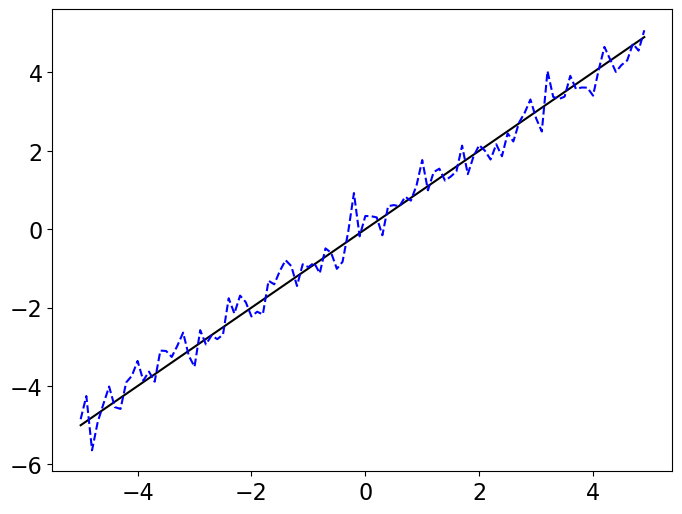

In [19]:
xdp = l2.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xdp, '--b')

moreau(l2, x, tau)

Then only x-b

True

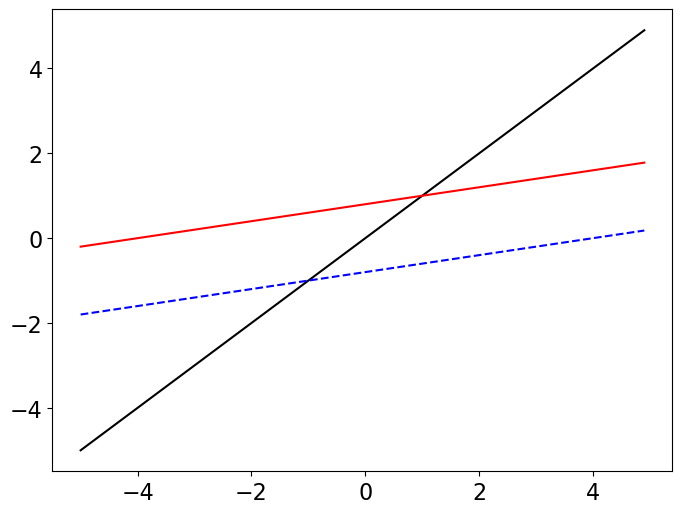

In [20]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)

l2 = L2(b=np.ones(nx))
xp = l2.prox(x, tau)
xdp = l2.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(l2, x, tau)

Finally we also add the dot-product term

True

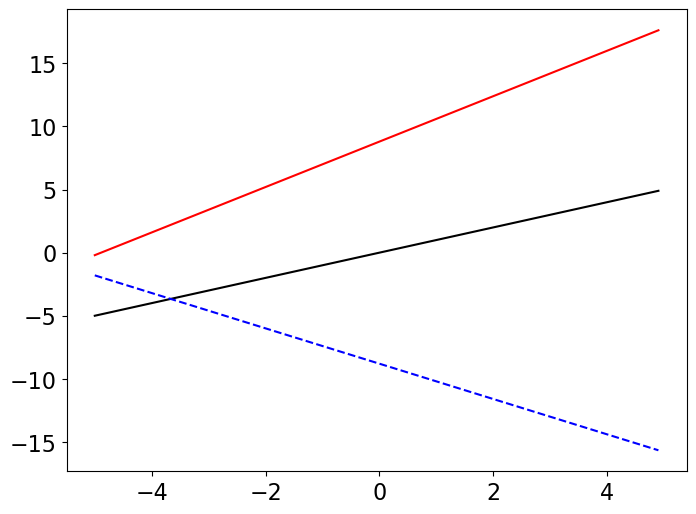

In [21]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)

l2 = L2(b=np.ones(nx), q=np.arange(nx), alpha=-0.2)
xp = l2.prox(x, tau)
xdp = l2.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(l2, x, tau)

Let's now add a dot product term to it (done using +/- operator)

82665.13328546335


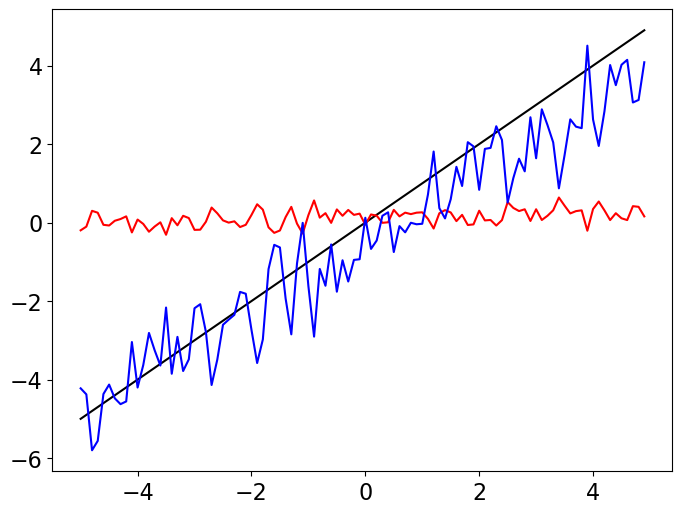

In [22]:
A = np.random.normal(0, 1, (ny, nx))

l2 = L2(Op=MatrixMult(A), b=np.ones(ny), q=np.arange(nx), alpha=-0.2)
print(l2(x))
xp = l2.prox(x, tau)
xpd = l2.proxdual(x, tau)

plt.figure()
plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xpd, 'b');

82665.13328546335


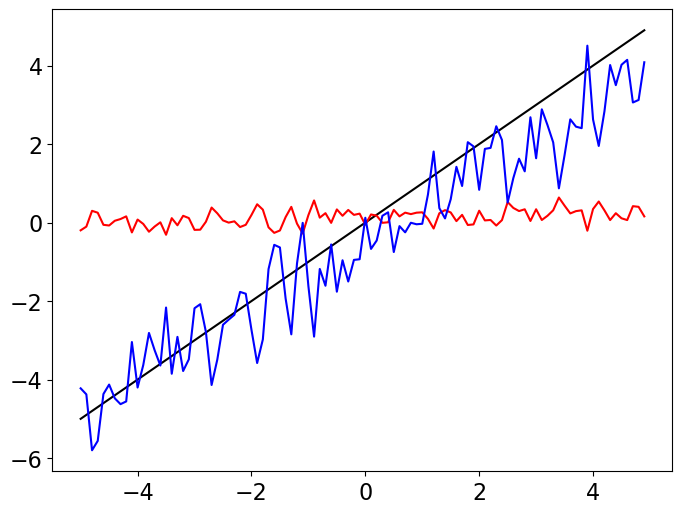

In [23]:
q = np.arange(nx)
l2 = L2(Op=MatrixMult(A), b=np.ones(ny)) - 0.2 * q
print(l2(x))
xp = l2.prox(x, tau)
xpd = l2.proxdual(x, tau)

plt.figure()
plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xpd, 'b');

## $L_{2,1}$ Norm

True

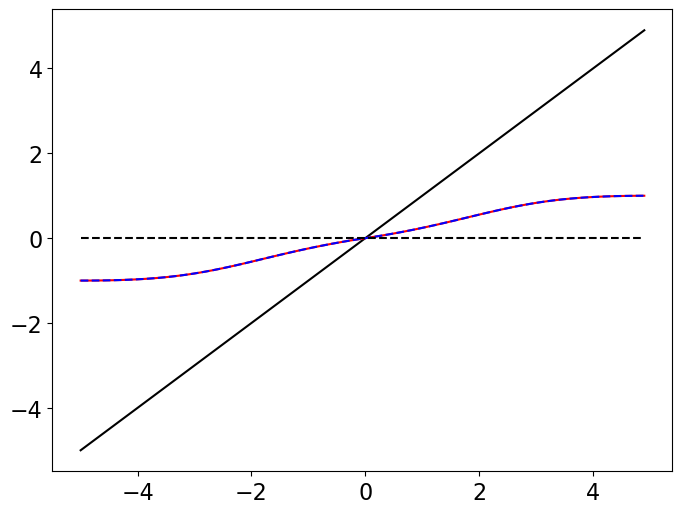

In [24]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)

l2 = L21(ndim=2, sigma=1)
xp = l2.prox(x, tau)
xdp = l2.proxdual(x, tau)
xdp1 = l2._proxdual_moreau(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xdp, 'r')
plt.plot(x, xdp1, '--b')
plt.plot(x, xdp-xdp1, '--k')

moreau(l2, x, tau)

## Simplex 

Single vector

121.49999999999997
False
False
50.0000001311302
same prox  True
same proxdual  True


True

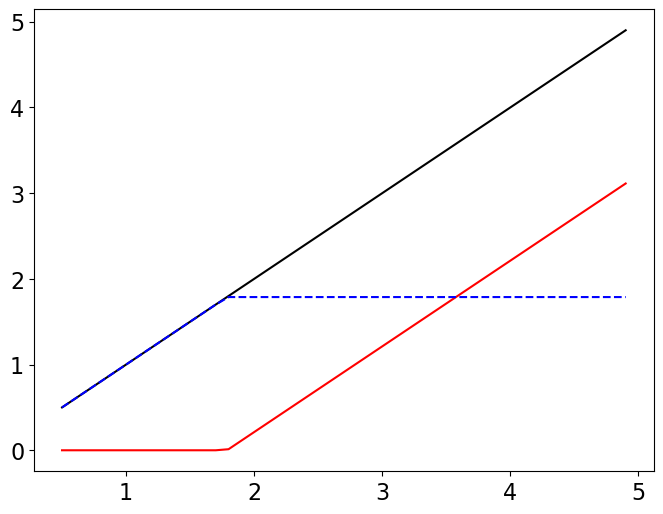

In [25]:
tau = 4.
x = np.arange(0.5, 5, 0.1)
nx = len(x)
print(np.sum(x))

sim = Simplex(n=nx, radius=50)
sim1 = Simplex(n=nx, radius=50, engine='numba')
print(sim(x))
print(sim1(x))

xp = sim.prox(x, 1)
xdp = sim.proxdual(x, 1)
xp1 = sim1.prox(x, 1)
xdp1 = sim1.proxdual(x, 1)
print(np.sum(xp))
print('same prox ', np.allclose(xp,xp1, rtol=1e-2, atol=1e-2))
print('same proxdual ',np.allclose(xdp,xdp1, rtol=1e-2, atol=1e-2))

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(sim, x, tau)

Set of vectors (comparision numpy vs numba implementations)

In [26]:
dims = (5, 4)
x = np.random.normal(0, 1, dims)
x[:, 1] = np.arange(dims[0]) + 1
x[:, 1] /= np.sum(x[:,1])

axis = 0
sim = Simplex(n=dims[0]*dims[1], radius=3., dims=dims, axis=axis)
sim1 = Simplex(n=dims[0]*dims[1], radius=3., dims=dims, axis=axis, engine='numba')
print(sim(x))
print(sim1(x))

xp = sim.prox(x.ravel(), 1)
xp1 = sim1.prox(x.ravel(), 1)
print(xp.reshape(dims), np.sum(xp.reshape(dims), axis=axis))
print(sim(xp))
print('same prox ', np.allclose(xp,xp1, rtol=1e-5, atol=1e-5))

xdp = sim.proxdual(x.ravel(), 1)
xdp1 = sim1.proxdual(x.ravel(), 1)
print('same proxdual ',np.allclose(xdp,xdp1, rtol=1e-5, atol=1e-5))

moreau(sim, x.ravel(), 1)

False
False
[[1.14849107 0.46666667 0.         0.        ]
 [0.9014441  0.53333333 1.31665853 0.21878113]
 [0.09015939 0.6        1.10894116 2.07068133]
 [0.1782199  0.66666667 0.57440033 0.48370772]
 [0.68168554 0.73333333 0.         0.22682984]] [2.99999999 2.99999999 3.00000002 3.00000002]
True
same prox  True
same proxdual  True


True

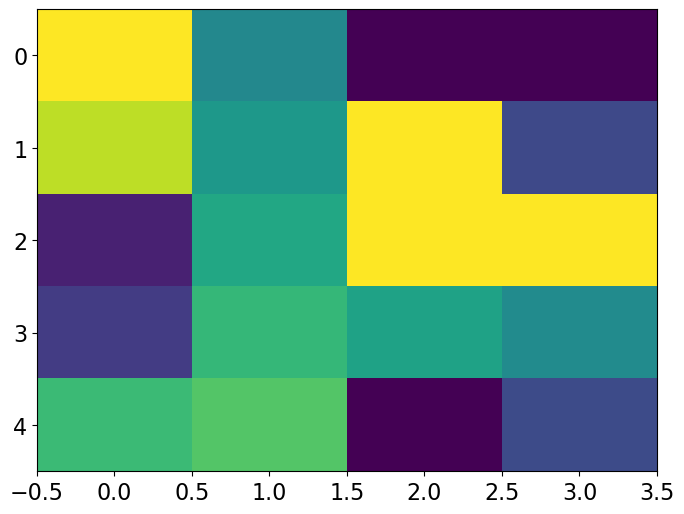

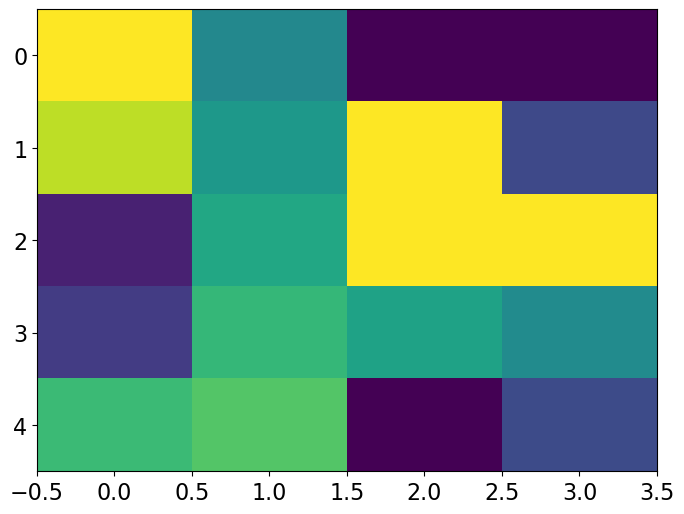

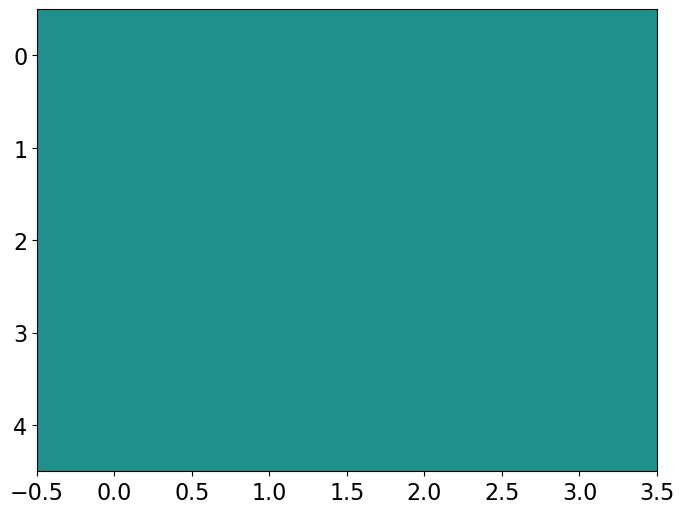

In [27]:
plt.figure()
plt.imshow(xp.reshape(x.shape), vmin=0, vmax=1)
plt.axis('tight')
plt.figure()
plt.imshow(xp1.reshape(x.shape), vmin=0, vmax=1)
plt.axis('tight')
plt.figure()
plt.imshow(xp.reshape(x.shape)-xp1.reshape(x.shape), vmin=-0.01, vmax=0.01)
plt.axis('tight');

In [28]:
dims = (5, 4)
x = np.random.normal(0, 1, dims)
x[1] = np.arange(dims[1]) + 1
x[1] /= np.sum(x[1])

axis = 1
sim = Simplex(n=dims[0]*dims[1], radius=1., dims=dims, axis=axis)
sim1 = Simplex(n=dims[0]*dims[1], radius=1., dims=dims, axis=axis, engine='numba')
print(sim(x))

xp = sim.prox(x.ravel(), 1)
xp1 = sim1.prox(x.ravel(), 1)
print(xp.reshape(dims), np.sum(xp.reshape(dims), axis=axis))
print(sim(xp))
print(xp1.reshape(dims), np.sum(xp1.reshape(dims), axis=axis))
print(sim(xp1))
print('same prox ', np.allclose(xp,xp1, rtol=1e-5, atol=1e-5))

xdp = sim.proxdual(x.ravel(), 1)
xdp1 = sim1.proxdual(x.ravel(), 1)
print('same proxdual ',np.allclose(xdp,xdp1, rtol=1e-5, atol=1e-5))

moreau(sim, x.ravel(), 1)

False
[[0.89635273 0.10364728 0.         0.        ]
 [0.1        0.2        0.3        0.4       ]
 [0.         1.         0.         0.        ]
 [0.         0.69834225 0.30165775 0.        ]
 [0.22645331 0.02240183 0.53945951 0.21168536]] [1.         1.         1.         1.         1.00000001]
True
[[0.89635273 0.10364728 0.         0.        ]
 [0.1        0.2        0.3        0.4       ]
 [0.         1.00000001 0.         0.        ]
 [0.         0.69834225 0.30165775 0.        ]
 [0.22645331 0.02240183 0.53945951 0.21168536]] [1.         1.         1.00000001 1.         1.00000001]
True
same prox  True
same proxdual  True


True

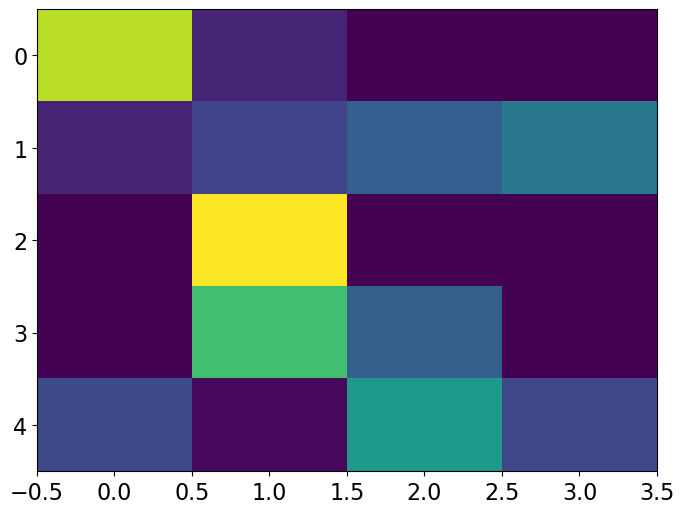

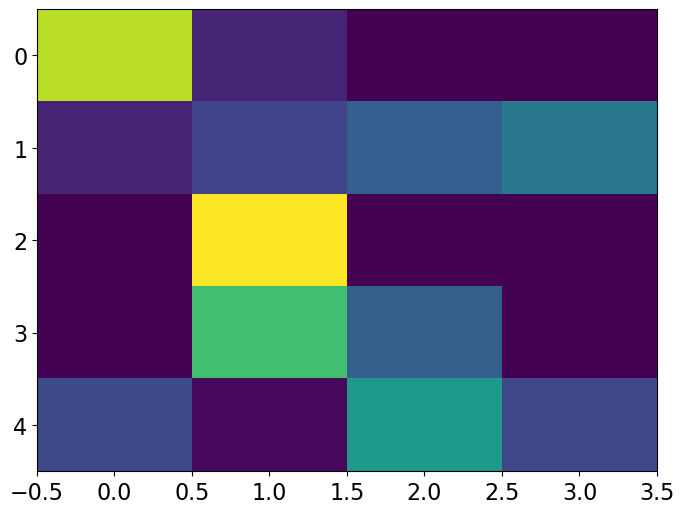

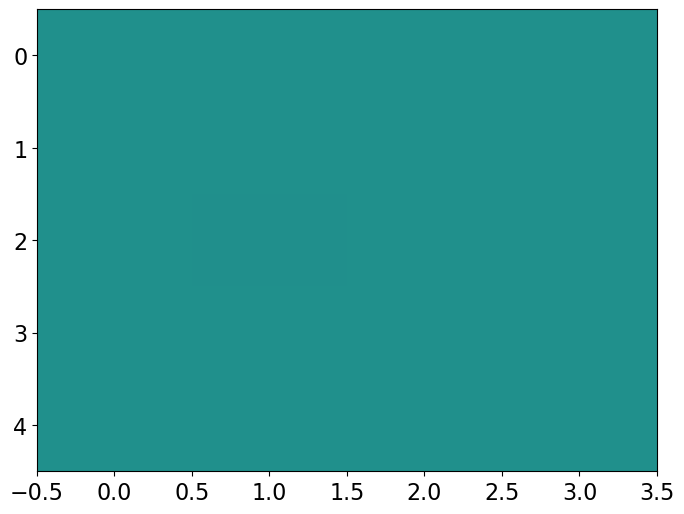

In [29]:
plt.figure()
plt.imshow(xp.reshape(x.shape), vmin=0, vmax=1)
plt.axis('tight')
plt.figure()
plt.imshow(xp1.reshape(x.shape), vmin=0, vmax=1)
plt.axis('tight')
plt.figure()
plt.imshow(xp.reshape(x.shape)-xp1.reshape(x.shape), vmin=-0.01, vmax=0.01)
plt.axis('tight');

## Huber norm

True

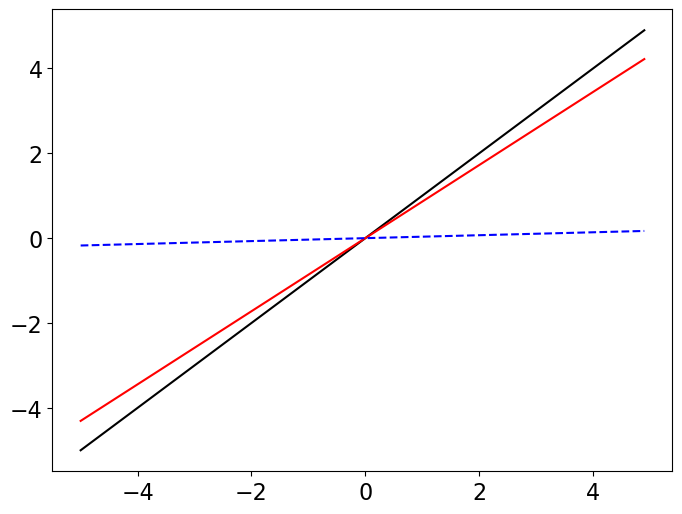

In [30]:
tau = 4.
x = np.arange(-5, 5, 0.1)

hu = Huber(alpha=1.)
xp = hu.prox(x, tau)
xdp = hu.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(hu, x, tau)

## Any function of Qx with Q orthogonal

True

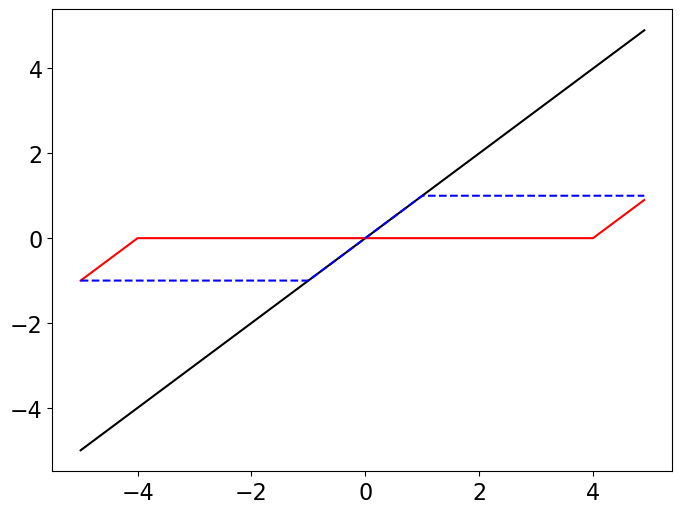

In [31]:
tau = 4
x = np.arange(-5, 5, 0.1)

l1 = L1()
orth = Orthogonal(l1, Identity(len(x)))
xp = orth.prox(x, tau)
xdp = orth.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(hu, x, tau)

In [32]:
# Check that I get the same result as L1 (Identity doesnt do anything)
xp1 = l1.prox(x, tau)

print(xp - xp1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Any function of Qx + b with Q orthogonal

True

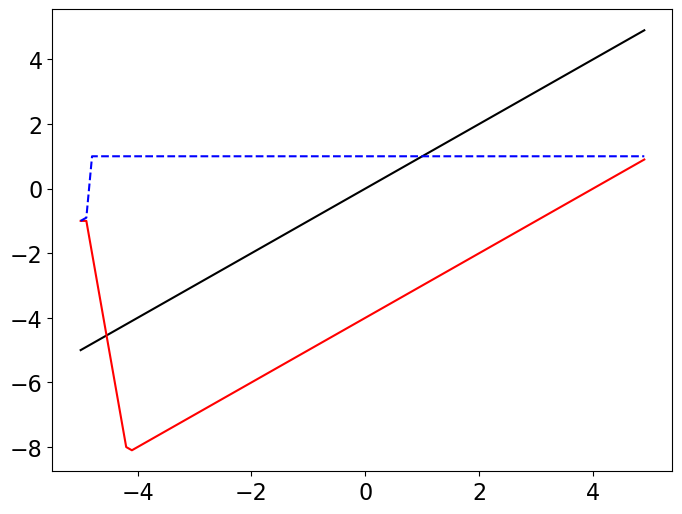

In [33]:
tau = 4.
x = np.arange(-5, 5, 0.1)

l1 = L1()
orth = Orthogonal(l1, Identity(len(x)), b=np.arange(len(x)))
xp = orth.prox(x, tau)
xdp = orth.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(orth, x, tau)

## Any function of Qx + b with Q semi-orthogonal

True

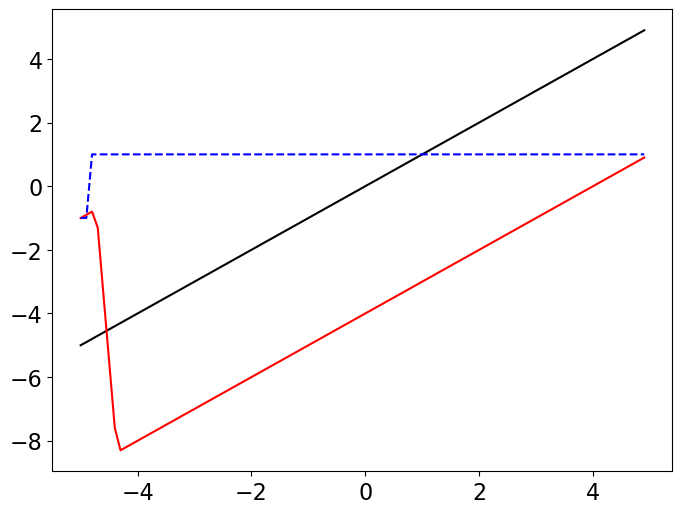

In [34]:
tau = 4.
x = np.arange(-5, 5, 0.1)

l1 = L1()
orth = Orthogonal(l1, Identity(len(x)), b=np.arange(len(x)), 
                  partial=True, alpha=0.5)
xp = orth.prox(x, tau)
xdp = orth.proxdual(x, tau)

plt.plot(x, x, 'k')
plt.plot(x, xp, 'r')
plt.plot(x, xdp, '--b')

moreau(orth, x, tau)

# Adjoint operator

In [35]:
tau = 2
sigma = 1.5
eucl = Euclidean(sigma=sigma)
eucl1 = eucl.H

x = np.arange(-1, 1, 0.1) / 0.4
print(eucl(x))
print(eucl1(x))

print(eucl.prox(x, tau) - eucl1.proxdual(x, tau))
print(eucl.proxdual(x, tau) - eucl1.prox(x, tau))

9.706634329158588
9.706634329158588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
